In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [2]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

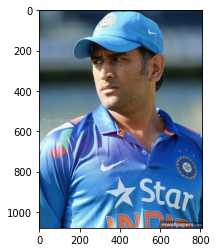

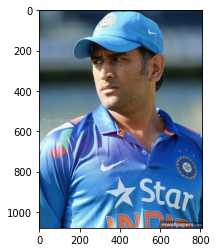

<function matplotlib.pyplot.show(close=None, block=None)>

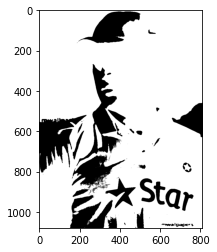

In [3]:
filename="media/dhoni.jpg"
img=read_file(filename)
img1=read_file(filename)
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_img=cv2.medianBlur(gray_img,7)
des,img3=cv2.threshold(gray_img,150,255,cv2.THRESH_BINARY_INV)
plt.imshow(img3,cmap="gray")
plt.show

Create Edge Mask

In [4]:
def edge_mark(img,line_size,blur_value):
    # input: Gray Scale Image
    # output: Edges of images
    gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray_img,blur_value)
    
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

<function matplotlib.pyplot.show(close=None, block=None)>

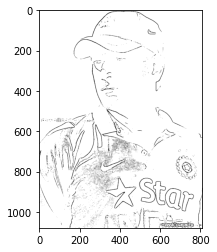

In [5]:

edges=edge_mark(img,line_size=5,blur_value=7)
plt.imshow(edges,cmap="gray")
plt.show


Reduce the color palette


In [6]:
def color_quantization(img,k):
    
    #Transform imgae
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    
    
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

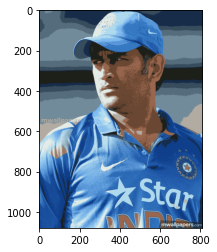

In [7]:
img=color_quantization(img,k=15)
plt.imshow(img)
plt.show()


Reduce noice

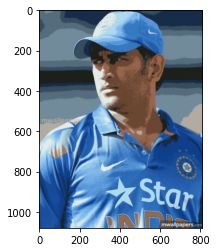

In [8]:

blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

Combine edge mask with quantized

In [9]:

def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()
    plt.imshow(img1)
    plt.show()

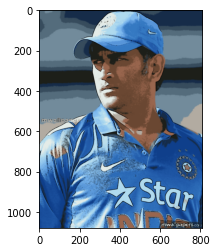

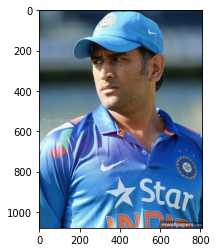

In [10]:
cartoon()